In [70]:
using CSV
using LinearAlgebra
using Clustering

In [71]:
irisData = CSV.File("Iris Data Set.csv")

150-element CSV.File{false}:
 CSV.Row: (Index = 1, SepalLength = 5.1, SepalWidth = 3.5, PetalLength = 1.4, PetalWidth = 0.2)
 CSV.Row: (Index = 2, SepalLength = 4.9, SepalWidth = 3.0, PetalLength = 1.4, PetalWidth = 0.2)
 CSV.Row: (Index = 3, SepalLength = 4.7, SepalWidth = 3.2, PetalLength = 1.3, PetalWidth = 0.2)
 CSV.Row: (Index = 4, SepalLength = 4.6, SepalWidth = 3.1, PetalLength = 1.5, PetalWidth = 0.2)
 CSV.Row: (Index = 5, SepalLength = 5.0, SepalWidth = 3.6, PetalLength = 1.4, PetalWidth = 0.2)
 CSV.Row: (Index = 6, SepalLength = 5.4, SepalWidth = 3.9, PetalLength = 1.7, PetalWidth = 0.4)
 CSV.Row: (Index = 7, SepalLength = 4.6, SepalWidth = 3.4, PetalLength = 1.4, PetalWidth = 0.3)
 CSV.Row: (Index = 8, SepalLength = 5.0, SepalWidth = 3.4, PetalLength = 1.5, PetalWidth = 0.2)
 CSV.Row: (Index = 9, SepalLength = 4.4, SepalWidth = 2.9, PetalLength = 1.4, PetalWidth = 0.2)
 CSV.Row: (Index = 10, SepalLength = 4.9, SepalWidth = 3.1, PetalLength = 1.5, PetalWidth = 0.1)
 CSV.Row: 

In [72]:
#generate similarity matrix
similarityMatrix = zeros(150, 150)
for row in irisData
    for col in irisData
        similarityMatrix[row.Index, col.Index] = abs(row.SepalLength - col.SepalLength);
    end
end
display(similarityMatrix);

150×150 Array{Float64,2}:
 0.0  0.2  0.4  0.5  0.1  0.3  0.5  0.1  …  1.7  1.6  1.6  1.2  1.4  1.1  0.8
 0.2  0.0  0.2  0.3  0.1  0.5  0.3  0.1     1.9  1.8  1.8  1.4  1.6  1.3  1.0
 0.4  0.2  0.0  0.1  0.3  0.7  0.1  0.3     2.1  2.0  2.0  1.6  1.8  1.5  1.2
 0.5  0.3  0.1  0.0  0.4  0.8  0.0  0.4     2.2  2.1  2.1  1.7  1.9  1.6  1.3
 0.1  0.1  0.3  0.4  0.0  0.4  0.4  0.0     1.8  1.7  1.7  1.3  1.5  1.2  0.9
 0.3  0.5  0.7  0.8  0.4  0.0  0.8  0.4  …  1.4  1.3  1.3  0.9  1.1  0.8  0.5
 0.5  0.3  0.1  0.0  0.4  0.8  0.0  0.4     2.2  2.1  2.1  1.7  1.9  1.6  1.3
 0.1  0.1  0.3  0.4  0.0  0.4  0.4  0.0     1.8  1.7  1.7  1.3  1.5  1.2  0.9
 0.7  0.5  0.3  0.2  0.6  1.0  0.2  0.6     2.4  2.3  2.3  1.9  2.1  1.8  1.5
 0.2  0.0  0.2  0.3  0.1  0.5  0.3  0.1     1.9  1.8  1.8  1.4  1.6  1.3  1.0
 0.3  0.5  0.7  0.8  0.4  0.0  0.8  0.4  …  1.4  1.3  1.3  0.9  1.1  0.8  0.5
 0.3  0.1  0.1  0.2  0.2  0.6  0.2  0.2     2.0  1.9  1.9  1.5  1.7  1.4  1.1
 0.3  0.1  0.1  0.2  0.2  0.6  0.2  0.

In [73]:
#generate sigma neighborhood adjacency matrix
adjacencyMatrix = zeros(150, 150)
for row in irisData
    for col in irisData
        if similarityMatrix[row.Index, col.Index] > .25
            adjacencyMatrix[row.Index, col.Index] = 0   
        else
            adjacencyMatrix[row.Index, col.Index] = 1
        end
        
    end
end
display(adjacencyMatrix);

150×150 Array{Float64,2}:
 1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.

In [96]:
#generate degree matrix
degreeMatrix = zeros(150, 150)
for i = 1:150
    counter = 0
    for j = 1:150
        if i != j
            if adjacencyMatrix[i, j] == 1
                counter = counter + 1
            end
        end
    end
    degreeMatrix[i, i] = counter;
end
display(degreeMatrix);

150×150 Array{Float64,2}:
 29.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  31.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  17.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  14.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  33.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  23.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [97]:
#generate laplacian matrix
laplacianMatrix = zeros(150, 150)
for i = 1:150
    for j = 1:150
        laplacianMatrix[i, j] = degreeMatrix[i, j] - adjacencyMatrix[i, j]
    end
end
display(laplacianMatrix)

150×150 Array{Float64,2}:
 28.0  -1.0   0.0   0.0  -1.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  30.0  -1.0   0.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0  16.0  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0  13.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -1.0   0.0   0.0  32.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  22.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -1.0   0.0   0.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -1.0  -1.0   0.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0  -1.0  -1.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0  -1.0  -1.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [98]:
eigvecLaplacian = eigvecs(laplacianMatrix)

150×150 Array{Float64,2}:
 0.0816497  0.0290034     0.0939423  …   0.00733485   0.0199579
 0.0816497  0.0294251     0.100114       0.112123    -0.0557795
 0.0816497  0.0301691     0.111841      -0.0469147    0.0183149
 0.0816497  0.030764      0.121771      -0.00912682   0.000629421
 0.0816497  0.0292023     0.0968641     -0.146131     0.0450149
 0.0816497  0.0239704     0.0246776  …  -0.084512     0.0787459
 0.0816497  0.030764      0.121771      -0.00912682   0.000629421
 0.0816497  0.0292023     0.0968641     -0.146131     0.0450149
 0.0816497  0.0316363     0.136786       0.00104893  -3.60498e-5
 0.0816497  0.0294251     0.100114       0.112123    -0.0557795
 0.0816497  0.0239704     0.0246776  …  -0.084512     0.0787459
 0.0816497  0.0297652     0.105454       0.0636178   -0.0102911
 0.0816497  0.0297652     0.105454       0.0636178   -0.0102911
 ⋮                                   ⋱               
 0.0816497  0.0175962    -0.0403372     -0.0910221   -0.09946
 0.0816497  0.0003983

In [102]:
#generate laplacian matrix
kEigvecLaplacian = zeros(150, 3)
for i = 1:150
    for j = 1:3
        kEigvecLaplacian[i, j] = eigvecLaplacian[i, j]
    end
end
display(kEigvecLaplacian)

150×3 Array{Float64,2}:
 0.0816497  0.0290034     0.0939423
 0.0816497  0.0294251     0.100114
 0.0816497  0.0301691     0.111841
 0.0816497  0.030764      0.121771
 0.0816497  0.0292023     0.0968641
 0.0816497  0.0239704     0.0246776
 0.0816497  0.030764      0.121771
 0.0816497  0.0292023     0.0968641
 0.0816497  0.0316363     0.136786
 0.0816497  0.0294251     0.100114
 0.0816497  0.0239704     0.0246776
 0.0816497  0.0297652     0.105454
 0.0816497  0.0297652     0.105454
 ⋮                       
 0.0816497  0.0175962    -0.0403372
 0.0816497  0.000398328  -0.107164
 0.0816497  0.0056513    -0.0986212
 0.0816497  0.000398328  -0.107164
 0.0816497  0.0203911    -0.0159207
 0.0816497  0.0030041    -0.104053
 0.0816497  0.0056513    -0.0986212
 0.0816497  0.0056513    -0.0986212
 0.0816497  0.013116     -0.0718867
 0.0816497  0.0102548    -0.0841096
 0.0816497  0.014407     -0.0639677
 0.0816497  0.0190546    -0.0277784

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       6.622166e-01
      1       3.451049e-01      -3.171117e-01 |        2
      2       3.055607e-01      -3.954419e-02 |        2
      3       2.962458e-01      -9.314846e-03 |        2
      4       2.840248e-01      -1.222108e-02 |        2
      5       2.751445e-01      -8.880281e-03 |        2
      6       2.670011e-01      -8.143356e-03 |        0
      7       2.670011e-01       0.000000e+00 |        0
K-means converged with 7 iterations (objv = 0.267001123449794)


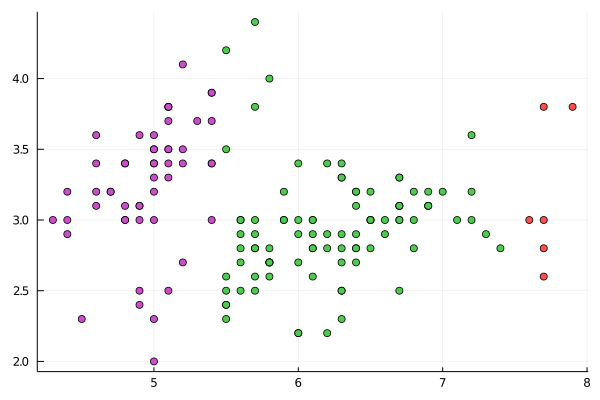

In [105]:
X = transpose(kEigvecLaplacian)
R = kmeans(X, 3; maxiter=300, display=:iter)
scatter(iris.SepalLength, iris.SepalWidth, marker_z=R.assignments,
        color=:lightrainbow, legend=false)

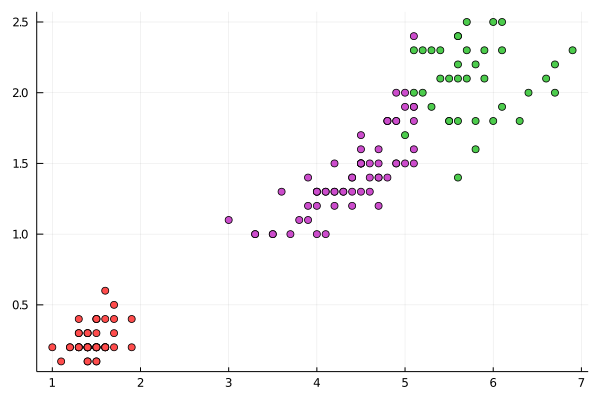

In [104]:
#STOLEN FROM CLUSTERING.JL
using RDatasets, Clustering, Plots
iris = dataset("datasets", "iris"); # load the data

features = collect(Matrix(iris[:, 1:4])'); # features to use for clustering
result = kmeans(features, 3); # run K-means for the 3 clusters

# plot with the point color mapped to the assigned cluster index
scatter(iris.PetalLength, iris.PetalWidth, marker_z=result.assignments,
        color=:lightrainbow, legend=false)